# Part 4 - Clustering

## K-Means

__Step 1__: Choose the number of clusters

__Step 2__: Select at random K points, the centroid (not necessarily from your dataset)

__Step 3__: Assign each data point to the closest centroid ---> the forms K clusters

__Step 4__: Compute and place the new centroid of each cluster

__Step 5__: Reassign each data point to the new closest centroid. If any reassignment took place, __go to Step 4__ otherwise go to FIN.

* Random initialization trap: Thre is the possibility that the cluster locations is highly dependent of the initial selection of the centroids. Solution: KMeans++

#### Choosing the right number of clusters

- Within Cluster Sum of Squares $WCSS = \sum_{P_i\in C_1} distance(P_i,C_1)^2 + \sum_{P_i\in C_2} distance(P_i,C_2)^2 + ...$

- The elbow method

In [1]:
# import the libraries that will be used
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

import scipy.cluster.hierarchy as sch

In [2]:
# import dataset
dir1 = '/Users/esousa/transfered/Classes/udemy_machineLearning_A-Z/Part4_Clustering/'
data = pd.read_csv(dir1+'Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# lets separate the features
X = data.iloc[:,[3,4]].values

In [4]:
help(KMeans)

Help on class KMeans in module sklearn.cluster.k_means_:

class KMeans(sklearn.base.BaseEstimator, sklearn.base.ClusterMixin, sklearn.base.TransformerMixin)
 |  KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=None, algorithm='auto')
 |  
 |  K-Means clustering
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, optional, default: 8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random' or an ndarray}
 |      Method for initialization, defaults to 'k-means++':
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose k observations (rows) at random from data for
 |      the initial centro

Text(0, 0.5, 'WCSS')

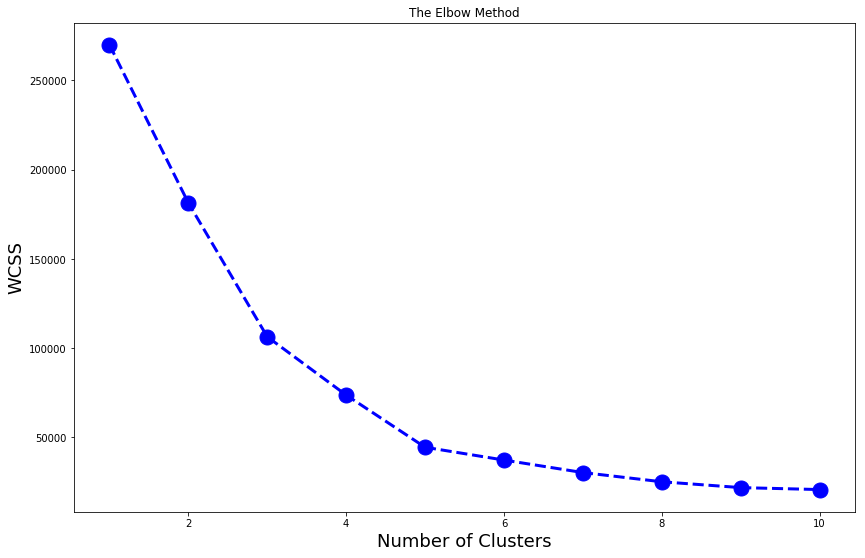

In [5]:
# Use the elbow method to find the optimal number of clusters
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.figure(figsize=(14,9))
plt.plot(range(1,11), wcss, 'bo--', lw=3, markersize=15)    
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters', fontsize=18)
plt.ylabel('WCSS', fontsize=18)

In [6]:
# Applying k-means to the mall dataset
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

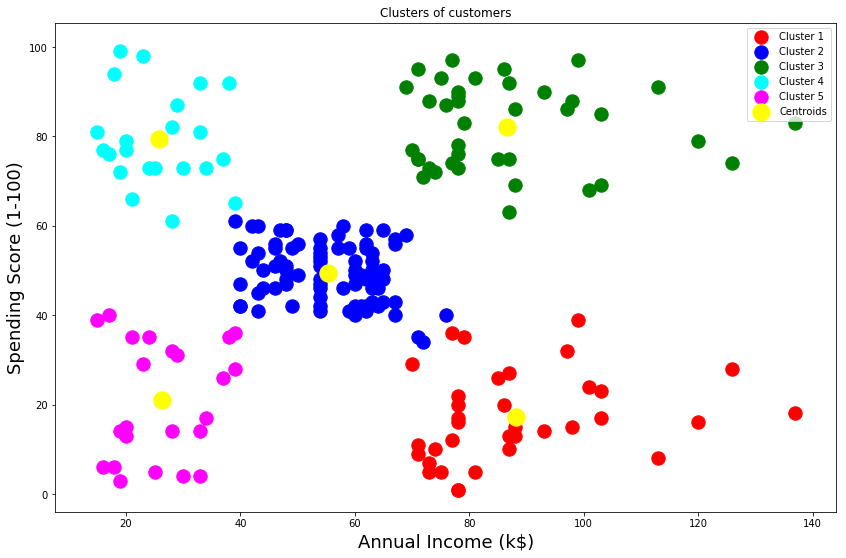

In [7]:
# Visualising the clusters
plt.figure(figsize=(14,9))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 180, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 180, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 180, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 180, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 180, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)', fontsize=18)
plt.ylabel('Spending Score (1-100)', fontsize=18)
plt.legend()

## Hierarchical Clustering (HC)

- Similar to KMeans but different process
- Two types, __Agglomerative__ and divisive

#### Agglomerative HC

__Step 1__: Make each data point a single-point cluster ---> that forms N clusters

__Step 2__: Take the two point and make them on cluster ---> That forms N-1 clusters

__Step 3__: Take the two _closest clusters_ and make them one cluster ---> that forms N-2 clusters

__Step 4__: Repeat _step 3_ until only one cluster

Euclidian Distance $=\sqrt{(x_2-x_1)^2+(y_2-y_1)^2}$

#### Dendograms

- Contains the memory of the clustering algorithm
- look at the dendogram and set threshold levels, the highest level of dissimilatiry that will be accepted
- Tells how many cluster you will have depending on the threshold
- Find largest distance (longest vertical line that doesn't cross a horizontal line), draw a horizontal line through it to find the optiman number of clusters

Text(0, 0.5, 'Euclidean distances')

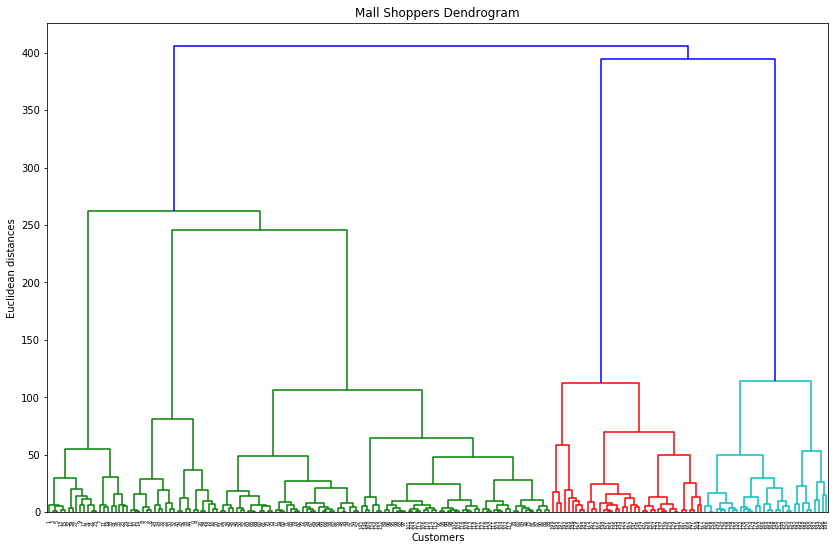

In [8]:
# Using the dendrogram to find the optimal number of clusters
plt.figure(figsize=(14,9))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward')) # linkage is the algorithm, Ward minimizes variance
plt.title('Mall Shoppers Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')

In [9]:
help(AgglomerativeClustering)

Help on class AgglomerativeClustering in module sklearn.cluster.hierarchical:

class AgglomerativeClustering(sklearn.base.BaseEstimator, sklearn.base.ClusterMixin)
 |  AgglomerativeClustering(n_clusters=2, affinity='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', pooling_func='deprecated')
 |  
 |  Agglomerative Clustering
 |  
 |  Recursively merges the pair of clusters that minimally increases
 |  a given linkage distance.
 |  
 |  Read more in the :ref:`User Guide <hierarchical_clustering>`.
 |  
 |  Parameters
 |  ----------
 |  n_clusters : int, default=2
 |      The number of clusters to find.
 |  
 |  affinity : string or callable, default: "euclidean"
 |      Metric used to compute the linkage. Can be "euclidean", "l1", "l2",
 |      "manhattan", "cosine", or 'precomputed'.
 |      If linkage is "ward", only "euclidean" is accepted.
 |  
 |  memory : None, str or object with the joblib.Memory interface, optional
 |      Used to cache the ou

In [10]:
# Fitting Hierarchical Clustering to the dataset
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

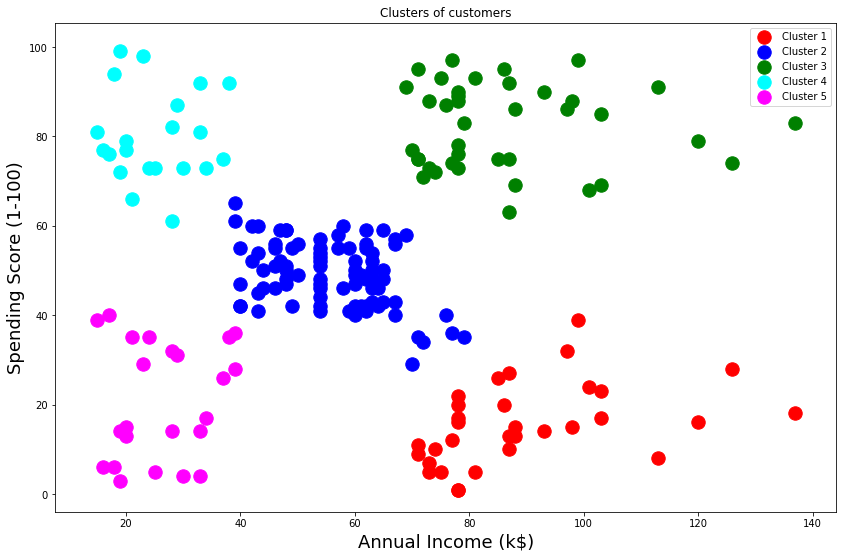

In [11]:
# Visualising the clusters
plt.figure(figsize=(14,9))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 180, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 180, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 180, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 180, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 180, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)', fontsize=18)
plt.ylabel('Spending Score (1-100)', fontsize=18)
plt.legend()

In [12]:
from IPython.display import IFrame
IFrame("./Clustering-Pros-Cons.pdf", width=1000, height=600)